# Design a loyalty program

### Introduction
A small food company is working on designing a customer loyalty program and the CEO need some help from the data perspective to figure out the best way to proceed. The dataset include customers' anual spendings on different categories. The goal is to provide discount to increase the total revenue.

### Thoughts 
The first approach is to consider this problem as a clustering problem. Based on the customers' purchasing habit and cluster the groups based on the revenue they generated.

Still vague now, let's explore the data first.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
print(pd.__version__, sns.__version__, np.__version__)

0.23.4 0.9.0 1.16.4


In [58]:
df = pd.read_csv('wholesale_data.csv')
df.head()

,Channel,Customer,Year,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,6048141,2017,12669,9656,7561,214,2674,1338
1,2,9336325,2017,7057,9810,9568,1762,3293,1776
2,2,6272942,2017,6353,8808,7684,2405,3516,7844
3,1,7856217,2017,13265,1196,4221,6404,507,1788
4,2,6179511,2017,22615,5410,7198,3915,1777,5185


1. There are some missing value as "unrecorded".
2. The Year shows both date and month for 2016.

In [59]:
print ('The data size is: ',len(df))
df.isnull().sum()

The data size is:  801


Channel             0
Customer            0
Year                0
Fresh               2
Milk                3
Grocery             3
Frozen              3
Detergents_Paper    2
Delicassen          4
dtype: int64

In [60]:
df = df.dropna()
print (len(df))
Names = df.columns.tolist()
df = df[(df[Names] != 'unrecorded').all(axis=1)]
print (len(df))

784
770


In [61]:
df.Year.unique()

array(['2017', '08/01/2016'], dtype=object)

In [62]:
df = df.replace({'Year': '08/01/2016'}, '2016')
df.tail()

,Channel,Customer,Year,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
796,1,7034915,2016,1543,1476,1115,563,639,545
797,1,4485889,2016,2392,5710,10466,802,5132,369
798,2,3326242,2016,2782,681,1618,988,104,448
799,2,8680930,2016,992,6026,8026,940,8973,1506
800,1,4886018,2016,407,520,935,606,76,142


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 0 to 800
Data columns (total 9 columns):
Channel             770 non-null int64
Customer            770 non-null int64
Year                770 non-null object
Fresh               770 non-null object
Milk                770 non-null object
Grocery             770 non-null object
Frozen              770 non-null object
Detergents_Paper    770 non-null object
Delicassen          770 non-null object
dtypes: int64(2), object(7)
memory usage: 60.2+ KB


In [64]:
df = df.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 0 to 800
Data columns (total 9 columns):
Channel             770 non-null int64
Customer            770 non-null int64
Year                770 non-null int64
Fresh               770 non-null int64
Milk                770 non-null int64
Grocery             770 non-null int64
Frozen              770 non-null int64
Detergents_Paper    770 non-null int64
Delicassen          770 non-null int64
dtypes: int64(9)
memory usage: 60.2 KB


In [13]:
df.describe()

,Channel,Customer,Year,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,770.000000,7.700000e+02,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,1.346753,5.329454e+06,2016.541558,11025.228571,5212.823377,7258.512987,2677.551948,2733.454545,1352.505195
std,0.476246,2.532678e+06,0.498594,12028.376337,6793.939235,8901.713899,4324.496290,4518.502233,2662.518330
min,1.000000,1.133724e+06,2016.000000,2.000000,52.000000,2.000000,25.000000,2.000000,2.000000
25%,1.000000,3.287590e+06,2016.000000,2794.000000,1367.500000,2000.750000,603.000000,236.250000,372.000000
50%,1.000000,5.250036e+06,2017.000000,7412.500000,3217.000000,4422.500000,1292.500000,760.000000,834.000000
75%,2.000000,7.303826e+06,2017.000000,15174.750000,6464.250000,9484.500000,3038.500000,3598.250000,1602.500000
max,2.000000,9.990301e+06,2017.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


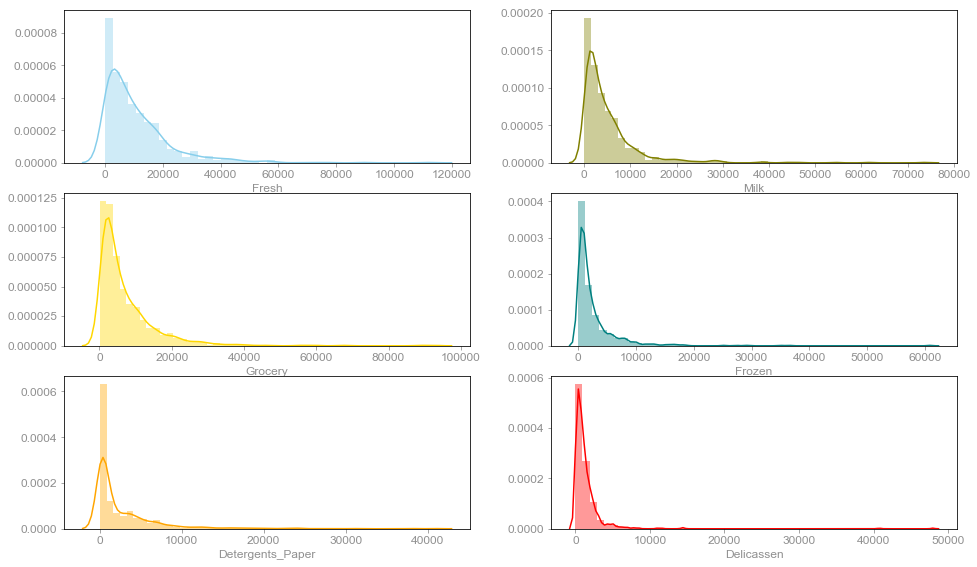

In [65]:
f, axes = plt.subplots(3, 2, figsize=(16, 8), sharex=False)
plt.subplots_adjust(bottom = 0.05, top = 0.95)
sns.distplot( df["Fresh"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df["Milk"] , color="olive", ax=axes[0, 1])
sns.distplot( df["Grocery"] , color="gold", ax=axes[1, 0])
sns.distplot( df["Frozen"] , color="teal", ax=axes[1, 1])
sns.distplot( df["Detergents_Paper"] , color="orange", ax=axes[2, 0])
sns.distplot( df["Delicassen"] , color="red", ax=axes[2, 1])

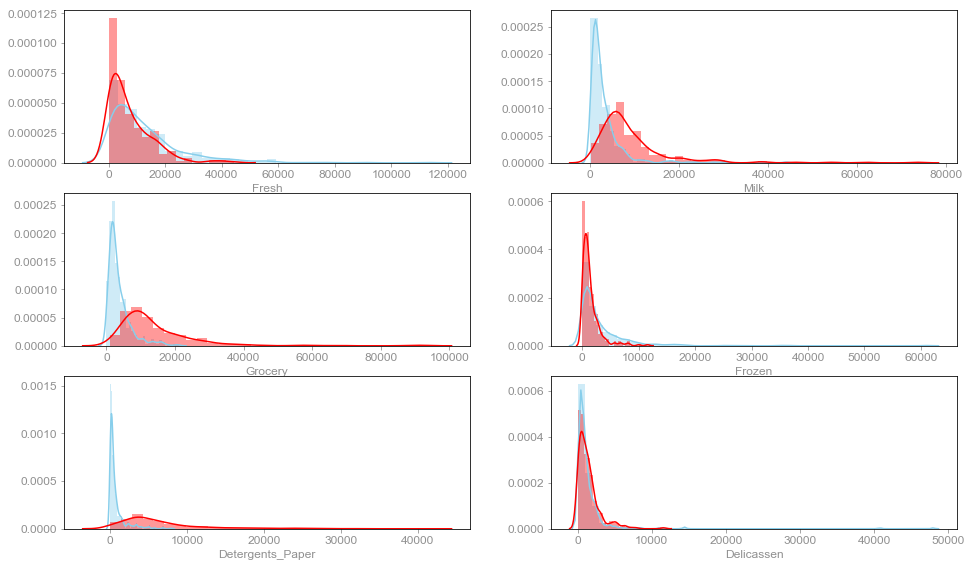

In [66]:
df1 = df[df['Channel']==1]
df2 = df[df['Channel']==2]
f, axes = plt.subplots(3, 2, figsize=(16, 8), sharex=False)
plt.subplots_adjust(bottom = 0.05, top = 0.95)
sns.distplot( df1["Fresh"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df2["Fresh"] , color="red", ax=axes[0, 0])
sns.distplot( df1["Milk"] , color="skyblue", ax=axes[0, 1])
sns.distplot( df2["Milk"] , color="red", ax=axes[0, 1])
sns.distplot( df1["Grocery"] , color="skyblue", ax=axes[1, 0])
sns.distplot( df2["Grocery"] , color="red", ax=axes[1, 0])
sns.distplot( df1["Frozen"] , color="skyblue", ax=axes[1, 1])
sns.distplot( df2["Frozen"] , color="red", ax=axes[1, 1])
sns.distplot( df1["Detergents_Paper"] , color="skyblue", ax=axes[2, 0])
sns.distplot( df2["Detergents_Paper"] , color="red", ax=axes[2, 0])
sns.distplot( df1["Delicassen"] , color="skyblue", ax=axes[2, 1])
sns.distplot( df2["Delicassen"] , color="red", ax=axes[2, 1])

It seems that Milk, Grocery and Detergents_Paper can be used to classify channel 1 and 2. But is this useful information to us?

Should I try to use Year information?

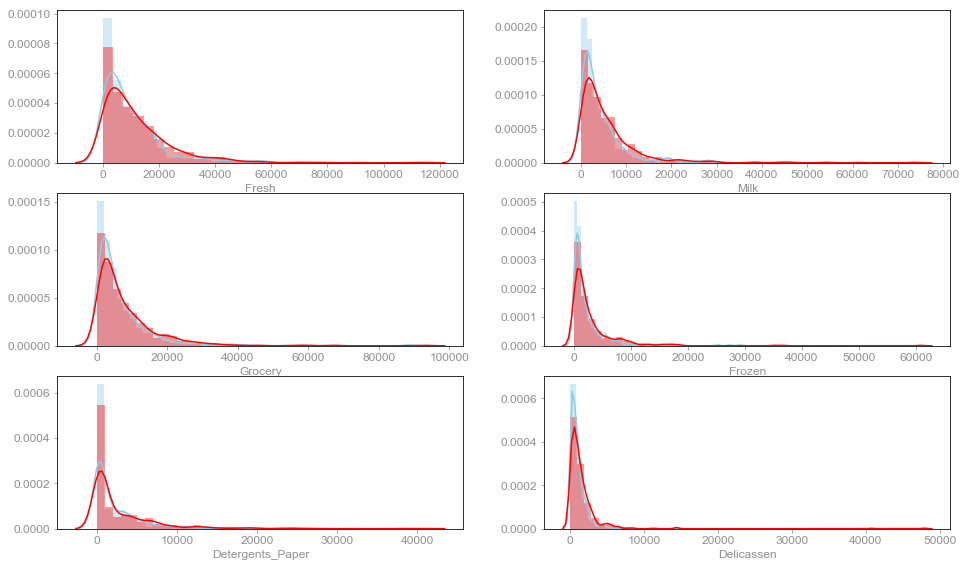

In [67]:
df16 = df[df['Year']==2016]
df17 = df[df['Year']==2017]
f, axes = plt.subplots(3, 2, figsize=(16, 8), sharex=False)
plt.subplots_adjust(bottom = 0.05, top = 0.95)
sns.distplot( df16["Fresh"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df17["Fresh"] , color="red", ax=axes[0, 0])
sns.distplot( df16["Milk"] , color="skyblue", ax=axes[0, 1])
sns.distplot( df17["Milk"] , color="red", ax=axes[0, 1])
sns.distplot( df16["Grocery"] , color="skyblue", ax=axes[1, 0])
sns.distplot( df17["Grocery"] , color="red", ax=axes[1, 0])
sns.distplot( df16["Frozen"] , color="skyblue", ax=axes[1, 1])
sns.distplot( df17["Frozen"] , color="red", ax=axes[1, 1])
sns.distplot( df16["Detergents_Paper"] , color="skyblue", ax=axes[2, 0])
sns.distplot( df17["Detergents_Paper"] , color="red", ax=axes[2, 0])
sns.distplot( df16["Delicassen"] , color="skyblue", ax=axes[2, 1])
sns.distplot( df17["Delicassen"] , color="red", ax=axes[2, 1])

The distirbution pattern is very similar across year.

In [68]:
df.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis =1)

,Channel,Customer,Year,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.0,-0.039,-0.042,-0.21,0.43,0.56,-0.21,0.6,0.029
Customer,-0.039,1.0,0.011,0.05,-0.029,0.013,0.025,-0.02,0.0068
Year,-0.042,0.011,1.0,0.084,0.099,0.1,0.1,0.052,0.067
Fresh,-0.21,0.05,0.084,1.0,0.083,-0.011,0.36,-0.1,0.25
Milk,0.43,-0.029,0.099,0.083,1.0,0.72,0.11,0.68,0.36
Grocery,0.56,0.013,0.1,-0.011,0.72,1.0,-0.03,0.91,0.2
Frozen,-0.21,0.025,0.1,0.36,0.11,-0.03,1.0,-0.13,0.42
Detergents_Paper,0.6,-0.02,0.052,-0.1,0.68,0.91,-0.13,1.0,0.069
Delicassen,0.029,0.0068,0.067,0.25,0.36,0.2,0.42,0.069,1.0


There are a few highly correlated pairs: Grocery, Milk and Detergents_Paper are correlated. Delicassen and Frozen are correlated. Channel, Milk, Grocery and Detergents_Paper are correlated.
**At this point, I would suggest** 
1. providing coupons for the third product to customer who purchase two of the following three: Grocery, Milk and Detergents_Paper.
2. What about clustering?

### Look at the revenue distribution

In [101]:
# df['Total'] = df.sum(axis=1)
name = ['Year','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
df_feature = df[name].sum(axis = 0)
df_feature

KeyError: "['Year'] not in index"

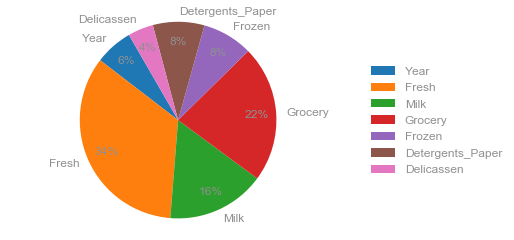

In [70]:
fig, ax = plt.subplots()
percentages = [91, 9]
# explode=(0.1,0)
ax.pie(df_feature, labels = name,
       autopct='%1.0f%%', 
       shadow=False, startangle=120,   
       pctdistance=0.8)
ax.axis('equal')
# ax.set_title("Elephant in the Valley Survey Respondent Make-up")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

In [71]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

categorical = ['Channel', 'Year']
drop_feature = ['Customer']
df = df.drop(drop_feature, axis = 1)
for col in categorical:   
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis=1)
    df.drop(col, axis=1, inplace=True)
df.head()  

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Year_2016,Year_2017
0,12669,9656,7561,214,2674,1338,0,1,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,1


In [76]:
mms = MinMaxScaler()
mms.fit(df)
data_transformed = mms.transform(df)

/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [77]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

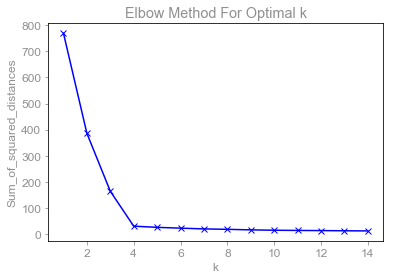

In [78]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [79]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

In [92]:
label = kmeans.labels_
df['label']= label
df.head(n=10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Year_2016,Year_2017,label
0,12669,9656,7561,214,2674,1338,0,1,0,1,1
1,7057,9810,9568,1762,3293,1776,0,1,0,1,2
2,6353,8808,7684,2405,3516,7844,0,1,0,1,1
3,13265,1196,4221,6404,507,1788,1,0,0,1,1
4,22615,5410,7198,3915,1777,5185,0,1,0,1,0
5,9413,8259,5126,666,1795,1451,0,1,0,1,1
6,12126,3199,6975,480,3140,545,0,1,0,1,1
7,7579,4956,9426,1669,3321,2566,0,1,0,1,1
8,5963,3648,6192,425,1716,750,1,0,0,1,1
9,6006,11093,18881,1159,7425,2098,0,1,0,1,2


In [93]:
unique, counts = np.unique(label, return_counts=True)
dict(zip(unique, counts))

{0: 86, 1: 514, 2: 156, 3: 14}

In [96]:
data = df.groupby(label).mean()

In [121]:
new = data[['Fresh', 'Milk','Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'label']]
df2 = pd.melt(new, id_vars=['label'])
df2

,label,variable,value
0,0,Fresh,36797.011628
1,1,Fresh,8459.935798
2,2,Fresh,4701.961538
3,3,Fresh,17355.000000
4,0,Milk,5410.255814
5,1,Milk,2818.303502
6,2,Milk,10287.051282
7,3,Milk,35371.714286
8,0,Grocery,5845.534884
9,1,Grocery,3645.661479


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

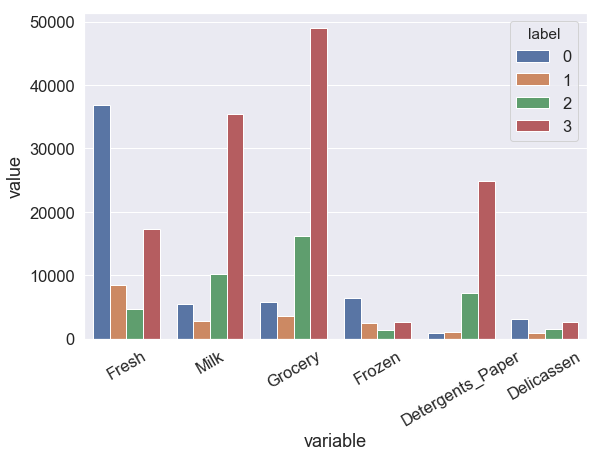

In [135]:
plt.figure(figsize = (9,6))
sns.set(font_scale=1.5)
label = ['86', '514', '156', '14']
sns.barplot(df2['variable'], df2['value'], hue = df2['label'])
plt.xticks(rotation=30)

**1. Group 3 has higher spending in Fresh, Milk, Grocery and Detergents_Paper. However, there are only 14 customers like this. The revenue might not increase much by setting up loyalty program in those customers due to the limited number.**

**2. Group 1 has the largest population, but their spending are lower in every category. Not suitable for loyalty program either.**

**3. I would suggest to try the loyalty program in Group 0 first. Group 0 has a okay population and most of their spendings are in the Fresh categorial, which generated most of the revenue. A loyalty program might increase the amount of their purchase in Fresh and generate more revenue. And it might also increase their purchase in other categories.**

**4. For group 2, I would suggest to try the loyalty program too. They have good spendings in Milk, Grocery and Detergents_Paper which indicate they come to the wholesale often. But their spending in Fresh is not high. Maybe they have other resounces for Fresh. If the loyalty program can convert those customers to purchase Fresh at this wholesale as well, it is going to increase the total revenue.**